# A. Regresi Linear 1D (Simple Regression)

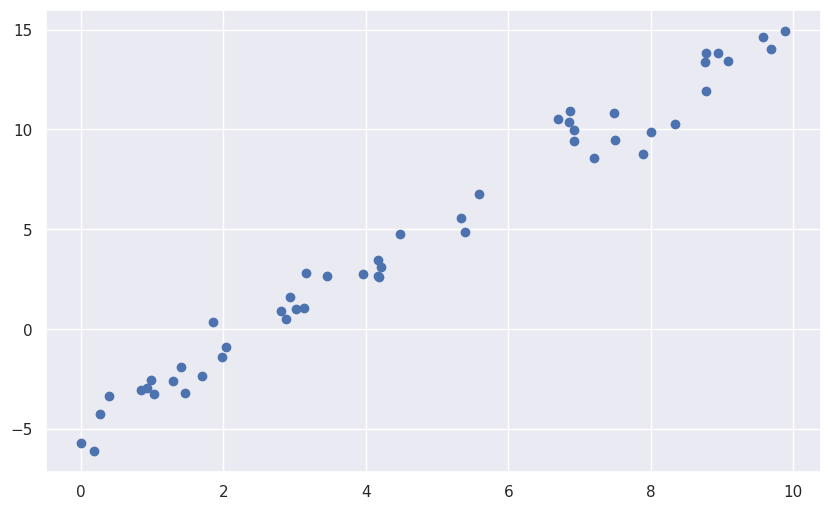

In [ ]:
# Import Library
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

rng = np.random.RandomState(1) #membuat nilai acak
x = 10 * rng.rand(50) #membuat 50 angka acak dalam rentang [0, 10)
y = 2 * x - 5 + rng.randn(50) #menghitung variabel x dengan mengikuti rumus y = 2x - 5 dengan penambahan noise atau gangguan yang terdistribusi secara normal
plt.scatter(x, y) #membuat scatterplot

Model slope :  2.0272088103606953
Model intercept  -4.998577085553204


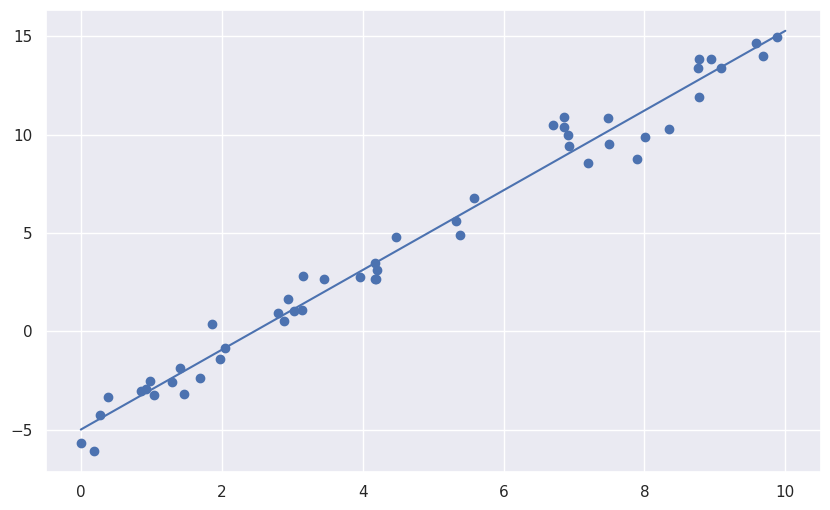

In [ ]:
from sklearn.linear_model import LinearRegression #import library
model = LinearRegression(fit_intercept = True) #melakukan pemodelan linier regresi dengan fit intercept  untuk menentukan titik potong

model.fit(x[:, np.newaxis], y) #melatih model regresi

xfit = np.linspace(0, 10, 1000) #berisi 1000 angka dengan nilai yang merata terdistribusi di antara 0 dan 10
yfit = model.predict(xfit[:, np.newaxis]) #menyimpan hasil prediksi

plt.scatter(x, y) #membuat scatter plot dan garis dari regresi
plt.plot(xfit, yfit);

print("Model slope : ", model.coef_[0]) #menampilkan nilai slope dan intercept
print("Model intercept ", model.intercept_)

## A1. Jika persamaan diubah menjadi y = −9x + 6, analisis hasil yang diperoleh.

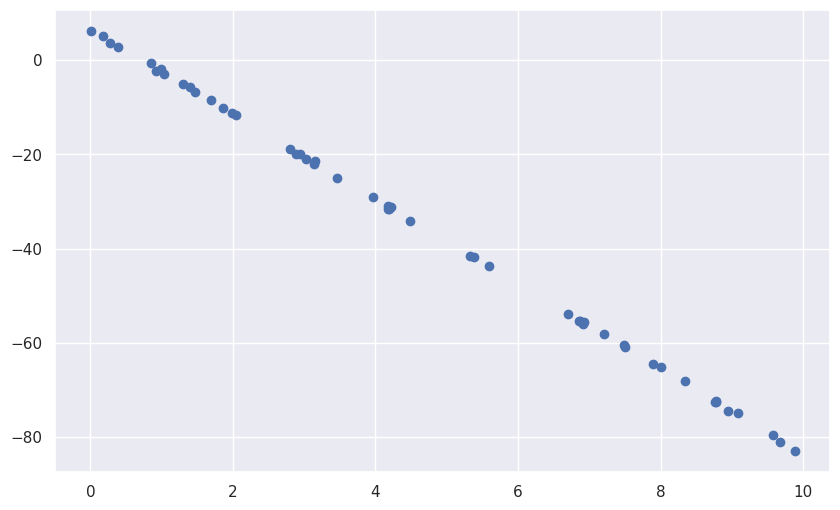

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = -9 * x + 6 + rng.rand(50)

plt.scatter(x,y)

##A2. Jika persamaan diubah seperti di Latihan A1 apa yang terjadi pada model slope dan intercept nya?jelaskan!

model slope :  -8.991769756772248
model intercept:  6.466347027900859


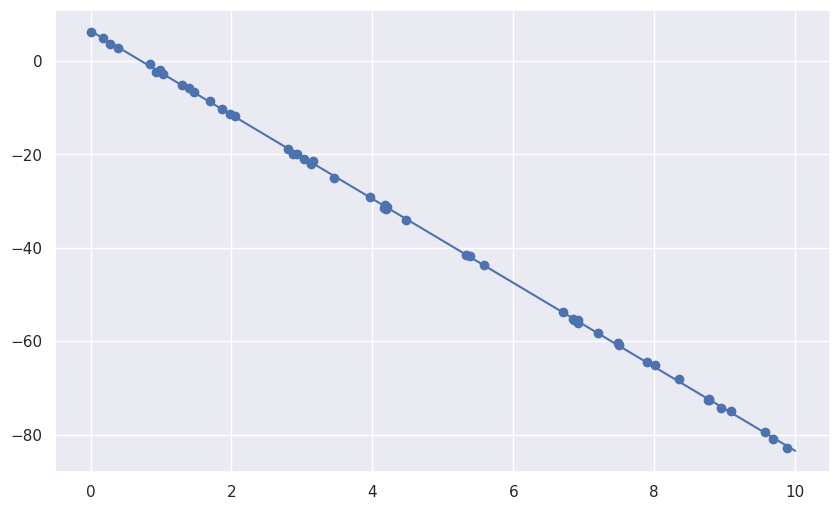

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0,10,1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit,yfit);

print('model slope : ', model.coef_[0])
print('model intercept: ', model.intercept_)

#B. Multiple Linear Regresi

In [ ]:
#import modul dan packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [ ]:
#import data
df = pd.read_csv('Real-estate1.csv')
df.drop('No', inplace = True, axis = 1) # menghapus kolom No

print(df.head()) #menampilkan 5 data teratas
print(df.columns) # menampilkan kolom-kolom

   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  


<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

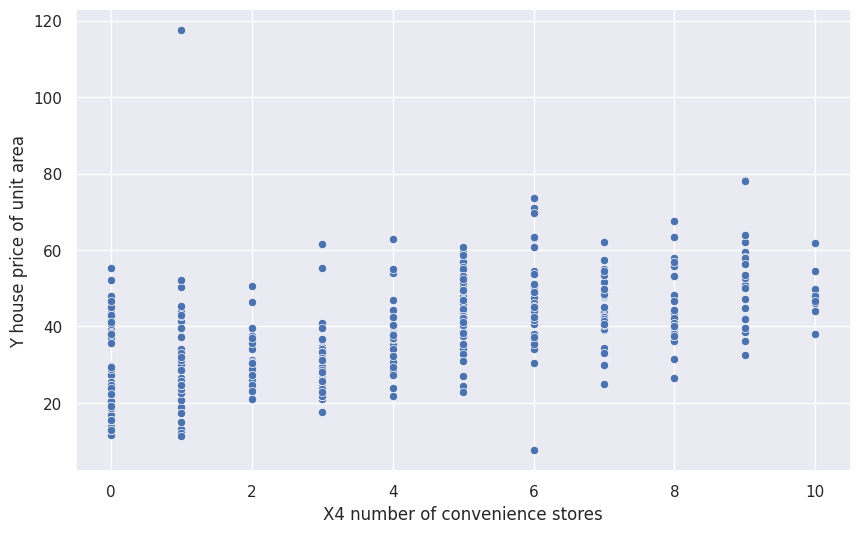

In [ ]:
#membuat scatterplot
sns.scatterplot(x='X4 number of convenience stores',
                y='Y house price of unit area', data = df)

In [ ]:
# membuat variabel independen dan dependen
x=df.drop('Y house price of unit area', axis = 1)
y= df['Y house price of unit area']

print(x)
print(y)

     X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..             

In [ ]:
# membagi data test dan data train
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.3, random_state= 101)

#membuat model regresi
model = LinearRegression()

#model fitting
model.fit(x_train, y_train)

#membuat prediksi
predictions = model.predict(x_test)

#evaluasi model
print('mean_squared_error:    ',mean_squared_error(y_test, predictions))
print('mean_absoluted_error:  ', mean_absolute_error(y_test, predictions))

mean_squared_error:     46.21179783492909
mean_absoluted_error:   5.392293684756193


# C. Fungsi Basis

## Fungsi basis polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures #import library
x = np.array([2, 3, 4]) #variabel x menyimpan nilai array

poly = PolynomialFeatures(3, include_bias = False) #tidak memasukkan bias
poly.fit_transform(x[:, None]) #mengambil nilai x menjadi matriks dengan polinom berderajat 3

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

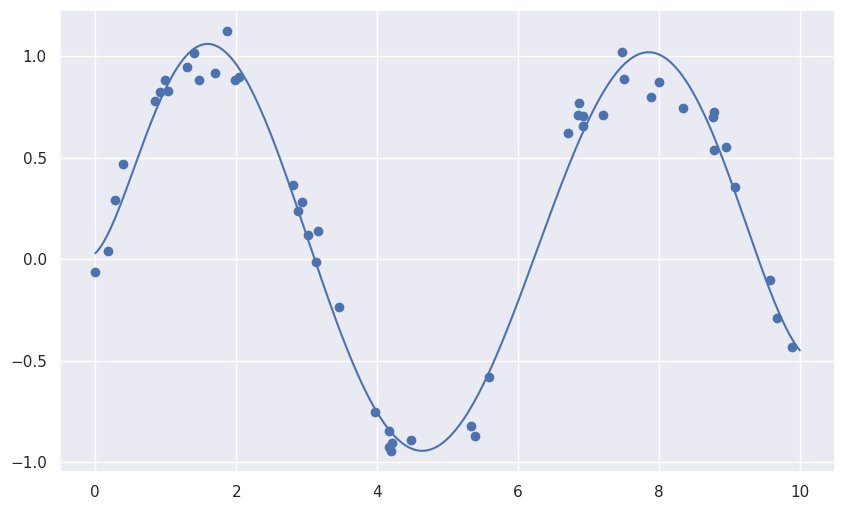

In [ ]:
from sklearn.pipeline import make_pipeline #mengimport library
#melakukan pemodelan pada polinom dengan derajat tujuh
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

rng = np.random.RandomState(1) #mengambil nilai random
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y) #melakukan polinomial model dari variabel x
yfit = poly_model.predict(xfit[:, np.newaxis]) #melakukan prediksi model

plt.scatter(x, y) #membuat scatter plot dari x dan y
plt.plot(xfit, yfit); #membuat plot dari xfit dan yfit sebagai nilai prediksi

###C.1 jika nilai fungsi dari y kita ubah menjadi y = sin (1 + x^2) bagaimana code dan hasil kurva nya? Jelaskan!

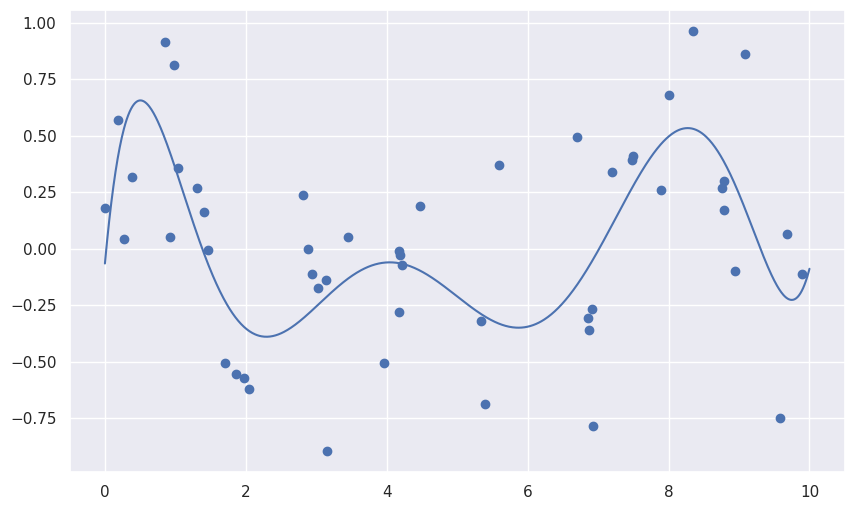

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(1+ x**2) * rng.rand(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x,y)
plt.plot(xfit, yfit);


## Fungsi Basis Gaussian

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin #import library

#membuat class untuk GaussianFeatures
class GaussianFeatures(BaseEstimator, TransformerMixin):
  """Fitur Gaussian dengan spasi seragam untuk input satu dimensi"""

  #membuat fungsi
  def __init__(self, N, width_factor = 2.0):
    self.N = N
    self.width_factor = width_factor

  @staticmethod # metode statistik
  def _gauss_basis(x, y, width, axis = None): #membuat fungsi _gauss_basis
    arg = (x - y) / width
    return np.exp(-0.5 * np.sum(arg ** 2, axis)) #mengembalikan nilai pada perhitungan eksponen beserta rumus

  def fit(self, X, y = None): #membuat fungsi fit
    self.centers_ = np.linspace(X.min(), X.max(), self.N)
    self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
    return self #mengembalikan nilai self

  def transform(self, X): #fungsi transform mengubah x menjadi fitur gauss
    return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis = 1)

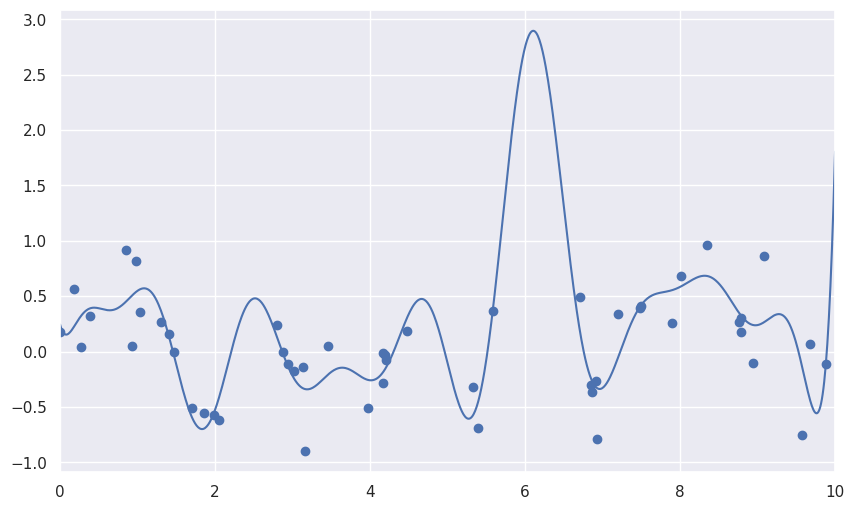

In [ ]:
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression()) #Model gauss dengan derajat 20
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis]) #memprediksi hasil

plt.scatter(x,y) #membuat scatterplot
plt.plot(xfit, yfit)
plt.xlim(0,10);

## Fungsi Basis Sigmoid

In [ ]:
#import library
import numpy as np

#membuat fungsi sigmoid
def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

#test fungsi sigmoid
print(sigmoid(0.5))

0.6224593312018546


In [ ]:
#menggunakan scipy untuk menerapkan fungsi sigmoid
from scipy.special import expit
print(expit(0.5))

0.6224593312018546


In [ ]:
#menerapkan fungsi sigmoid ke array numpy
def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

arr = np.array([-2, -1.5, -1, 0, 1, 1.5, 2]) #membuat array
print(sigmoid(arr)) #menampilkan output

[0.11920292 0.18242552 0.26894142 0.5        0.73105858 0.81757448
 0.88079708]


In [ ]:
#menerapkan fungsi sigmoid ke daftar nilai
def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

values = [-2, -1.5, -1, 0, 1, 1.5, 2] #membuat nilai
print([sigmoid(value) for value in values]) #menampilkan output

[0.11920292202211755, 0.18242552380635635, 0.2689414213699951, 0.5, 0.7310585786300049, 0.8175744761936437, 0.8807970779778823]


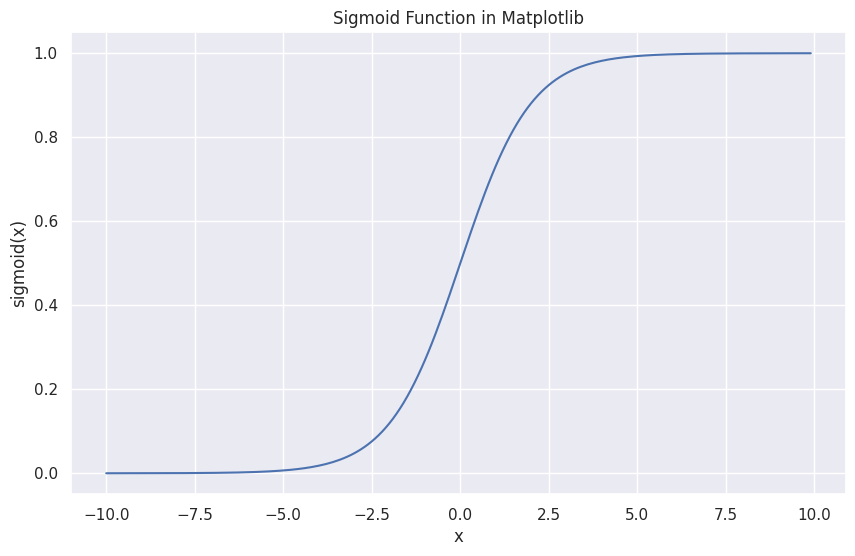

In [ ]:
#merencanakan fungsi sigmoid dengan python dengan matplotlib
def sigmoid(x):
  return 1.0/(1.0 + np.exp(-x))

values = np.arange(-10, 10, 0.1) #nilai array yang dimulai dari -10 dan bertambah 0.1 setiap langkahnya

plt.plot(values, sigmoid(values)) #membuat plot dengan nilai array dan menggunakan fungsi basis sigmoid
plt.xlabel('x') #membuat label untuk x dengan nama x
plt.ylabel('sigmoid(x)') #membuat label untuk y dengan nama sigmoid(x)
plt.title('Sigmoid Function in Matplotlib') #memberikan judul
plt.show() #mencetak plot

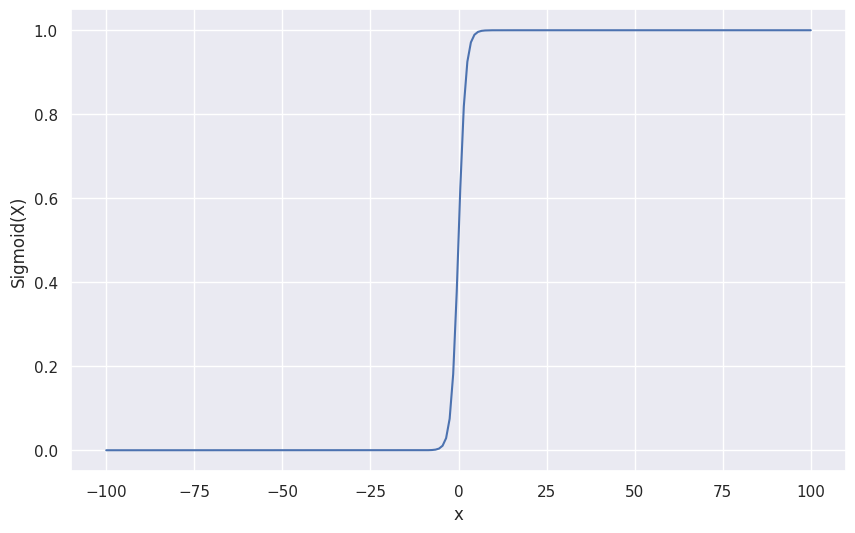

In [ ]:
import math # import library

x = np.linspace(-100, 100, 200) # membuat array
z = 1/(1 + np.exp(-x)) # membuat perhitungan

plt.plot(x,z) #membuat plot
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.show()

# D. Regresi Linear Beysian

In [ ]:
pip install pymc # Install Library pymc yang akan digunakan untuk pemodelan probabilistik dan inferensi bayesian dalam python

In [ ]:
# !pip install pymc
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
# Generate some sample data
np.random.seed(0)
X = np.linspace(0, 10, 100)
true_slope = 2
true_intercept = 1
Y = true_intercept + true_slope * X + np.random.normal(0, 1, size=100)

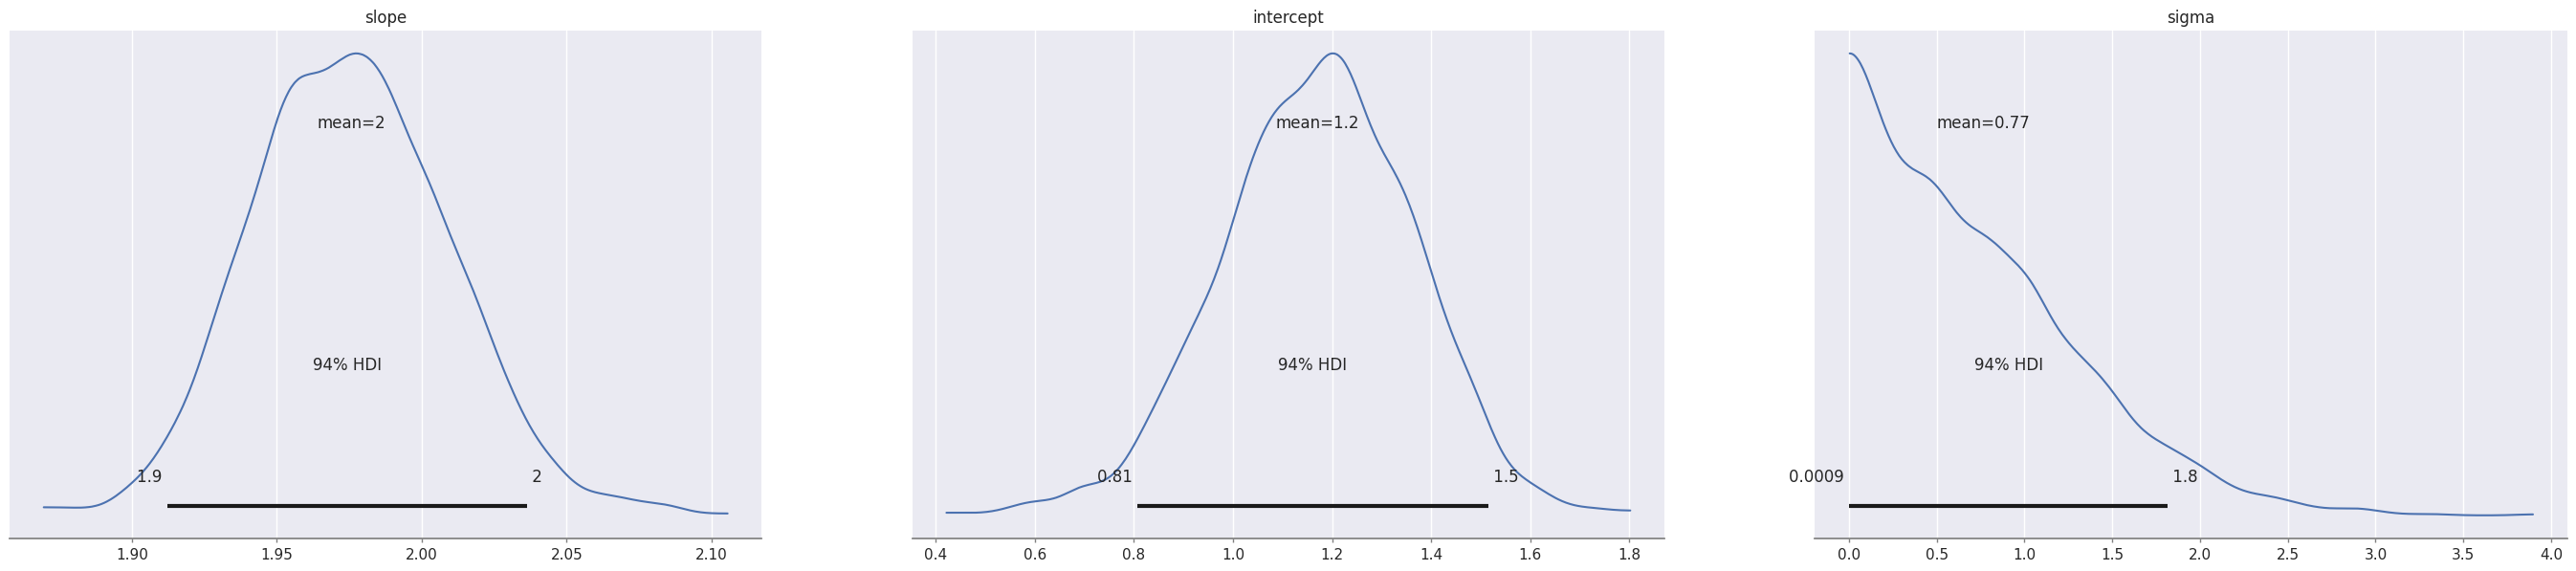

In [ ]:
with pm.Model() as model: #membuat fungsi pm.Model
  #prior for parameters
  slope = pm.Normal('slope', mu = 0) #menentukan slope dengan mu = 0 dan distribusi normal
  intercept = pm.Normal('intercept', mu = 0) #menentukan garis regresi dengan mu = 0 dan distribusi normal
  sigma = pm.HalfNormal('sigma') #sigma sama seperti standar deviasi dengan HalfNormal atau distribusi setengah normal

  #expected value of outcome
  mu = intercept + slope * X #perhitungan nilai mu

  #likelihood of observations
  Y_obs = pm.Normal('Y_obs', mu = mu, observed = Y) #likelihood dengan distribusi normal

  #run MCMC sampling
  trace = pm.sample(2000, tune = 1000) #jumlah iterasi yang dilakukan sebanyak 2000 dengan tune 1000

pm.plot_posterior(trace, var_names = ['slope', 'intercept', 'sigma']) #membuat plot
plt.show() #menampilkan plot

# E. Regresi Logistik

In [ ]:
# Import Library
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

plt.rcParams['figure.figsize'] = (10, 6) #membuat plot

#Load the data
data = pd.read_csv("Social_Network_Ads.csv") #membaca data
data.head() #menampilkan 5 data teratas

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


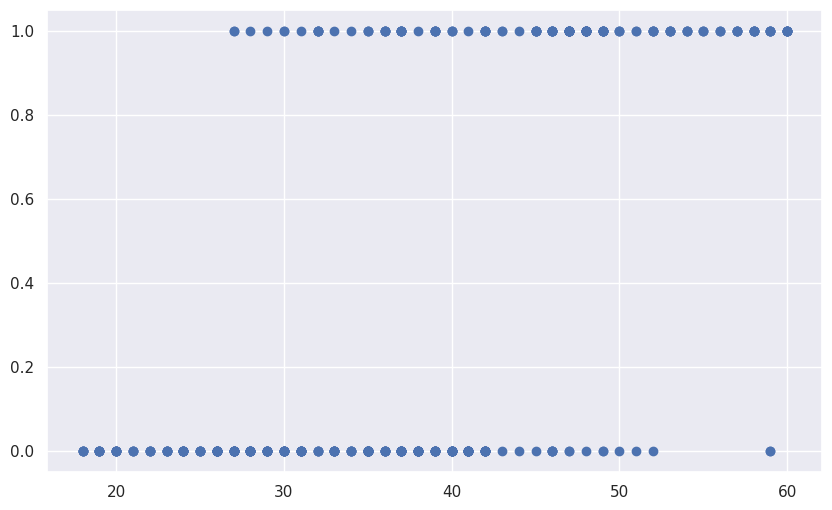

In [ ]:
# visualizing the dataset
plt.scatter(data['Age'], data['Purchased']) # membuat scatter plot
plt.show() #menampilkan scatter plot

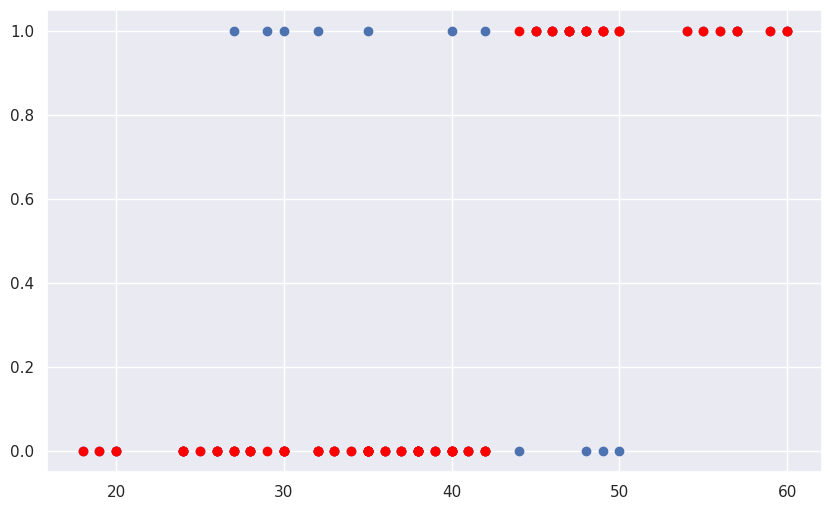

In [ ]:
# Membagi data menjadi data train dan data set
X_train, X_test, y_train, y_test = train_test_split(data['Age'],data['Purchased'], test_size = 0.20)

#Membuat model regresi logistik
#Membuat fungsi normalisasi
def normalize(X):
  return X - X.mean()

#Membuat fungsi prediksi
def predict(X, b0, b1):
  return np.array([1/(1+exp(-1*b0 + -1*b1*x))for x in X])

#Membuat fungsi untuk menguji model
def logistic_regression(X, Y):

  X = normalize(X)

  b0 = 0
  b1 = 0
  L = 0.001
  epochs = 300

  for epoch in range(epochs):
    y_pred = predict(X, b0, b1) #melakukan prediksi
    D_b0 = -2 * sum((Y - y_pred) * y_pred * (1- y_pred))
    D_b1 = -2 * sum(X *(Y - y_pred) * y_pred * (1- y_pred))

    b0 = b0 - L * D_b0 #perhitungan nilai b0
    b1 = b1 - L * D_b1 #perhitungan nilai b1
  return b0, b1 #membalikkan nilai b0 dan b1

#Menguji model
b0, b1 = logistic_regression(X_train, y_train)

#Membuat prediksi
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

#Membuat dan menampilkan plot
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c = "red")
plt.show()

In [ ]:
akurasi = 0 #variabel akurasi di isi dengan 0
for i in range(len(y_pred)): #perulangan for dengan panjang perulangan sesuai dengan y_pred
  if y_pred[i] == y_test.iloc[i]: #percabangan if
    akurasi += 1 #menghitung nilai akurasi
print(f"Accuracy = {akurasi / len(y_pred)}") #mencetak nilai akurasi dengan membagi panjang data dari y_pred

Accuracy = 0.8625


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


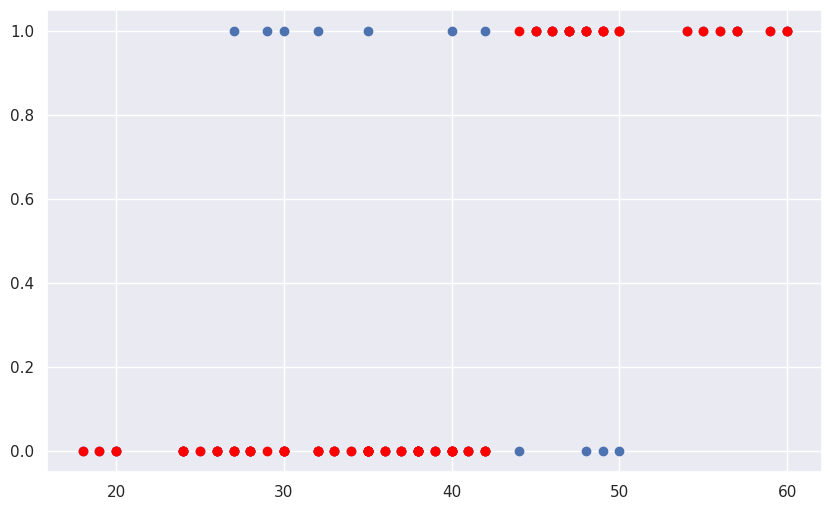

Accuracy = 0.8625


In [ ]:
# Membuat prediksi dengan scikit learn
from sklearn.linear_model import LogisticRegression

#Membuat instance and fit dari model
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1,1)) # Fitting Model

#Membuat prediksi
y_pred_sk = lr_model.predict(X_test.values.reshape(-1,1))

plt.clf() #menampilkan plot
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c = "red")
plt.show()

#Menampilkan hasil Accuracy
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1,1))}")

# F. Naïve Bayes

In [ ]:
csr = pd.read_csv('caesarian.txt') #membaca data
csr.head() #menampilkan 5 data teratas

,Age,Dev_number,Dev_time,Blood_preassure,heart_problem,caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [ ]:
x = csr.drop('caesarian', axis = 1) #menghapus kolom caesarian
x.head()#menampilkan 5 data teratas

,Age,Dev_number,Dev_time,Blood_preassure,heart_problem
0,22,1,0,2,0
1,26,2,0,1,0
2,26,2,1,1,0
3,28,1,0,2,0
4,22,2,0,1,0


In [ ]:
y = csr['caesarian'] #menampilkan hanya kolom caesarian
y.head() #menampilkan 5 data teratas

0    0
1    1
2    0
3    0
4    1
Name: caesarian, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split #import library
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123) #bagi data ke dalam train dan test

from sklearn.naive_bayes import GaussianNB #import library
modelnb = GaussianNB() #menentukan klasifikasi naive bayes
nbtrain = modelnb.fit(x_train, y_train) #model dengan data pelatihan x_train dan y_train

y_pred = nbtrain.predict(x_test) #model yang sudah dilatih dilakukan prediksi dan disimpan dalam variabel y_pred
y_pred #mencetak nilai prediksi dari variabel y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix #import library

y_actual = pd.Series([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0], name = 'actual') #variabel y_actual berisi nilai sebenarnya dari data
y_pred = pd.Series([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], name = 'prediction') #variabel y_pred berisi hasil prediksi dari model
#tabel kontingensi dari true positif, true negatif, false positif dan false negatif
df_confusion = pd.crosstab(y_actual, y_pred)
df_confusion #menampilkan df confusion

prediction,0,1
actual,,
0,5,4
1,5,2


In [ ]:
from sklearn.metrics import classification_report #import library
print(classification_report(y_test, y_pred)) #menampilkan klasifikasi

              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.33      0.29      0.31         7

    accuracy                           0.44        16
   macro avg       0.42      0.42      0.42        16
weighted avg       0.43      0.44      0.43        16

